Please enter the match id:  15155


Text(25, 1.6, 'Bilbao vs Barcelona')

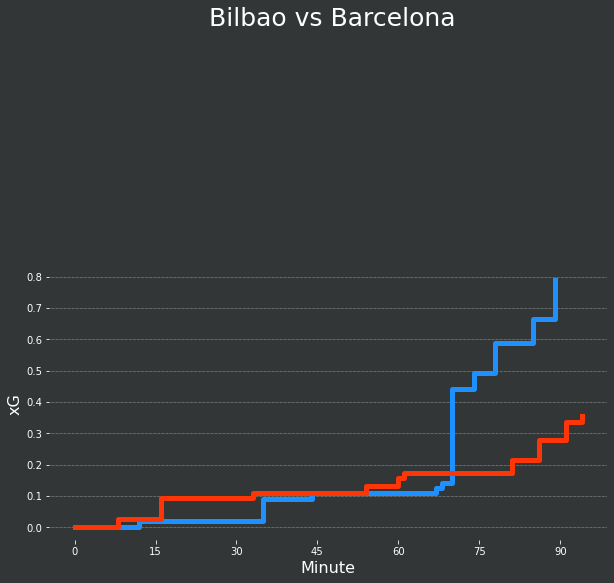

In [73]:
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

html = requests.get(url)
soup = BeautifulSoup(html.content, 'lxml')
scripts = soup.find_all('script')

strings = scripts[1].string

index_start = strings.index("('")+2
index_end = strings.index("')")
json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

x = []
y = []
minute = []
xG = []
result = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        elif key == 'Y':
            y.append(data_away[index][key])
        elif key == 'minute':
            minute.append(data_away[index][key])
        elif key == 'a_team':
            team.append(data_away[index][key])
        elif key == 'xG':
            xG.append(data_away[index][key])
        elif key == 'result':
            result.append(data_away[index][key])


col_names = ['x', 'y', 'minute', 'xG', 'result', 'team']
df = pd.DataFrame([x, y, minute, xG ,result ,team],index=col_names)
df = df.T
df = df.astype({'x':float, 'y':float, 'minute':int, 'xG':float})

a_xG = [0]
h_xG = [0]
a_minute = [0]
h_minute = [0]


hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_minute.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_minute.append(df['minute'][x])

def nums_comulative_sum(nums_list):
    return [sum(nums_list[:i+1])for i in range(len(nums_list))]

a_comulative = nums_comulative_sum(a_xG)
h_comulative = nums_comulative_sum(h_xG)

alast = round(a_comulative[-1],2)
hlast = round(h_comulative[-1],2)

fig,ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('#333636')
ax.patch.set_facecolor('#333636')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='white',axis='y',zorder=1)

spines = ['top','bottom','left','right']

for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

ax.step(
    x=a_minute,y=a_comulative,
    color='dodgerblue', label=ateam,
    linewidth=5, where='post'
)
ax.step(
    x=h_minute, y=h_comulative,
    color='#fd3607', label=ateam, 
    linewidth=5,where='post'
)
plt.text(25,1.6,'Bilbao vs Barcelona', fontsize=25, color='white')



In [74]:

_str = 'アイウエオ'
binary = _str.encode('unicode-escape')
print(binary)
print(type(binary))

str_from_binary = binary.decode('unicode-escape')
print(str_from_binary)
print(type(str_from_binary))

binary_type_str = binary.decode('utf-8')
print(binary_type_str)
print(type(binary_type_str))

a = binary_type_str.encode('utf-8').decode('unicode-escape')
print(type(a))
a



b'\\u30a2\\u30a4\\u30a6\\u30a8\\u30aa'
<class 'bytes'>
アイウエオ
<class 'str'>
\u30a2\u30a4\u30a6\u30a8\u30aa
<class 'str'>
<class 'str'>


'アイウエオ'

### source(https://github.com/doughagey/UnderstatScraper/blob/master/UnderstatScraper.py)

In [1]:
import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is 
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '39',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={
        'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 
        'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '3wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Create Pandas dataframes from each html table
print('Getting data for last 3 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2019', 'n_last_matches': '3'})
three_game_table = pd.DataFrame(json_player_data)
three_game_df = clean_df(three_game_table,'3wks')
#Replace Position indentifiers with something more useful
three_game_df['position'] = three_game_df['position'].str.slice(0,1)
position_map = {'D':'DEF', 'F':'FWD', 'M':'MID', 'G':'GK', 'S':'FWD'}
three_game_df = three_game_df.replace({'position': position_map})


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2019'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2019', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table, '5wks')

print('Getting data for last 10 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2019', 'n_last_matches': '10'})
ten_game_table = pd.DataFrame(json_player_data)
ten_game_df = clean_df(ten_game_table, '10wks')

print('Merging Tables')
EPL_player_df = pd.merge(three_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, ten_game_df, on=['id','player_name'])

print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined.csv', encoding='utf-8', index=False)

Getting data for last 3 matches
Getting data for the whole season
Getting data for last 5 matches
Getting data for last 10 matches
Merging Tables
Writing CSV File


### source ( https://github.com/shreyas7kha/DataVizTutorial/blob/main/DataVizProj.ipynb )

In [39]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [40]:
url ='https://understat.com/player/7781'
html = requests.get(url)
soup = BeautifulSoup(html.content,'lxml')

In [41]:
scripts = soup.find_all('script')
len(scripts)

25

In [42]:
strings = scripts[3].string
indexStart = strings.index("('")+2
indexEnd = strings.index("')")

json_data = strings[indexStart:indexEnd]
json_data = json_data.encode('utf8').decode('unicode_escape')

In [43]:
data = json.loads(json_data)

In [44]:
player = []
playerId = []
situation = []
shotType = []
player_assisted =[]
lastAction = []
x = []
y = []
xg = []
result = []
season = []
matchId = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='player':
            player.append(data[i][key])
        if key=='player_id':
            playerId.append(data[i][key])
        if key=='situation':
            situation.append(data[i][key])
        if key=='shotType':
            shotType.append(data[i][key])
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])
        if key=='match_id':
            matchId.append(data[i][key])

In [45]:
columns = ['Player', 'PlayerId', 'Situation', 'ShotType', 'X', 'Y', 'xG', 'Result', 'Season', 'MatchId']
df_understat = pd.DataFrame([player, playerId, situation, shotType, x, y, xg, result, season, matchId], index=columns)

In [46]:
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')
df_understat

,Player,PlayerId,Situation,ShotType,X,Y,xG,Result,Season,MatchId
0,Frenkie de Jong,7781,OpenPlay,RightFoot,0.925,0.493,0.576105,Goal,2019,12054
1,Frenkie de Jong,7781,OpenPlay,RightFoot,0.811,0.345,0.033490,SavedShot,2019,12113
2,Frenkie de Jong,7781,OpenPlay,LeftFoot,0.900,0.563,0.076398,SavedShot,2019,12231
3,Frenkie de Jong,7781,OpenPlay,RightFoot,0.944,0.528,0.596402,Goal,2019,12251
4,Frenkie de Jong,7781,OpenPlay,RightFoot,0.912,0.446,0.126620,BlockedShot,2020,14817
5,Frenkie de Jong,7781,OpenPlay,Head,0.921,0.543,0.053257,MissedShots,2020,14845
6,Frenkie de Jong,7781,FromCorner,Head,0.940,0.509,0.428009,MissedShots,2020,14875
7,Frenkie de Jong,7781,OpenPlay,LeftFoot,0.763,0.561,0.026599,BlockedShot,2020,14885
8,Frenkie de Jong,7781,OpenPlay,RightFoot,0.917,0.507,0.520452,Goal,2020,14905
9,Frenkie de Jong,7781,OpenPlay,RightFoot,0.792,0.485,0.030876,SavedShot,2020,14928


In [47]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*120)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*80)

df_understat

,Player,PlayerId,Situation,ShotType,X,Y,xG,Result,Season,MatchId
0,Frenkie de Jong,7781,OpenPlay,RightFoot,111.000000,39.439999,0.576105,Goal,2019,12054
1,Frenkie de Jong,7781,OpenPlay,RightFoot,97.319998,27.600000,0.033490,SavedShot,2019,12113
2,Frenkie de Jong,7781,OpenPlay,LeftFoot,108.000000,45.039999,0.076398,SavedShot,2019,12231
3,Frenkie de Jong,7781,OpenPlay,RightFoot,113.280002,42.239999,0.596402,Goal,2019,12251
4,Frenkie de Jong,7781,OpenPlay,RightFoot,109.439996,35.679999,0.126620,BlockedShot,2020,14817
5,Frenkie de Jong,7781,OpenPlay,Head,110.519998,43.439999,0.053257,MissedShots,2020,14845
6,Frenkie de Jong,7781,FromCorner,Head,112.800000,40.720001,0.428009,MissedShots,2020,14875
7,Frenkie de Jong,7781,OpenPlay,LeftFoot,91.560004,44.879999,0.026599,BlockedShot,2020,14885
8,Frenkie de Jong,7781,OpenPlay,RightFoot,110.039996,40.560001,0.520452,Goal,2020,14905
9,Frenkie de Jong,7781,OpenPlay,RightFoot,95.039996,38.800000,0.030876,SavedShot,2020,14928


In [10]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [11]:
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [12]:
from highlight_text import ax_text,fig_text
import mplsoccer

In [13]:
background = '#131313'
text_color = '#DEB887'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

[[Text(0.25, 0.8363888888888888, 'AGE: '),
  Text(0.3203125, 0.8363888888888888, '20')]]

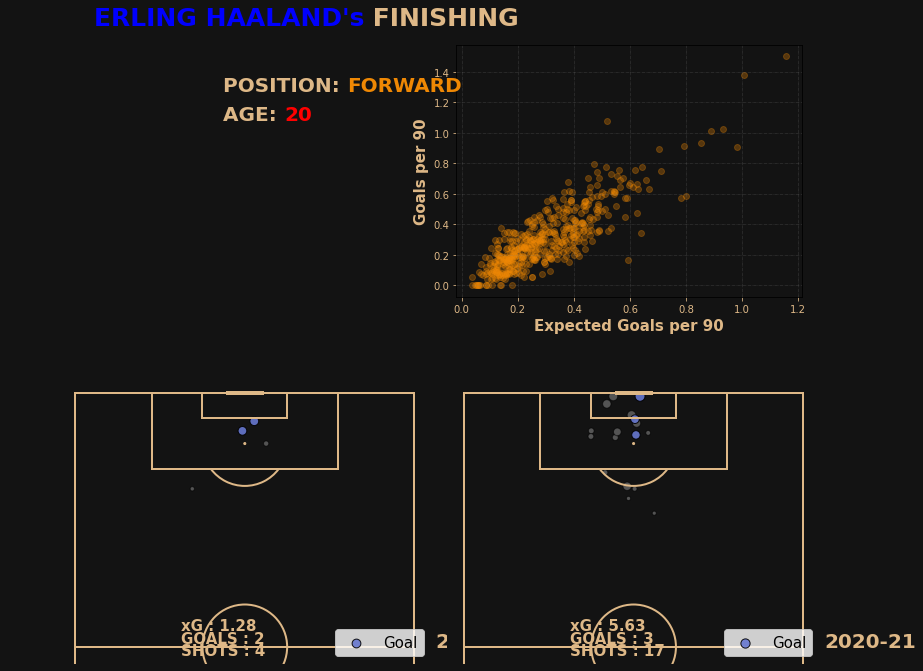

In [15]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='statsbomb',line_zorder=3,pitch_color='#131313',line_color="#DEB887")
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2019]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(85, 60, '2019-20', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2020]



pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(85, 60, '2020-21', weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING ERLING HAALAND'S DATA
df_player = df_fil[df_fil['Player']=='Erling Haaland']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING HAALAND'S IMAGE
ax_player = fig.add_axes([0,0.43,0.25,0.45])
ax_player.axis('off')
# # im = plt.imread('haaland.png')
# ax_player.imshow(im)

# ADDING TITLES AND INFO
fig_text(0.1,0.94,"<ERLING HAALAND's> FINISHING",weight='heavy', size=25, highlight_colors=['blue'])
fig_text(0.25,0.85,'POSITION: <FORWARD>',weight='bold', size=20, highlight_colors=['#EF8804'])
fig_text(0.25,0.81,'AGE: <20>',weight='bold', size=20, highlight_colors=['red'])

# ADDING CLUB LOGO
# ax_team = fig.add_axes([0.27,0.55,0.15,0.15])
# ax_team.axis('off')
# im = plt.imread('bvb.png')
# ax_team.imshow(im)

# ADDING A FOOTER
# fig_text(0.05,0.03,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com and Understat.com. Comparison with <forwards>'+
#         ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
#         size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

#plt.savefig('Haaland_viz.png',dpi=300,facecolor=background)

[[Text(0.25, 0.8363888888888888, 'AGE: '),
  Text(0.3203125, 0.8363888888888888, '20')]]

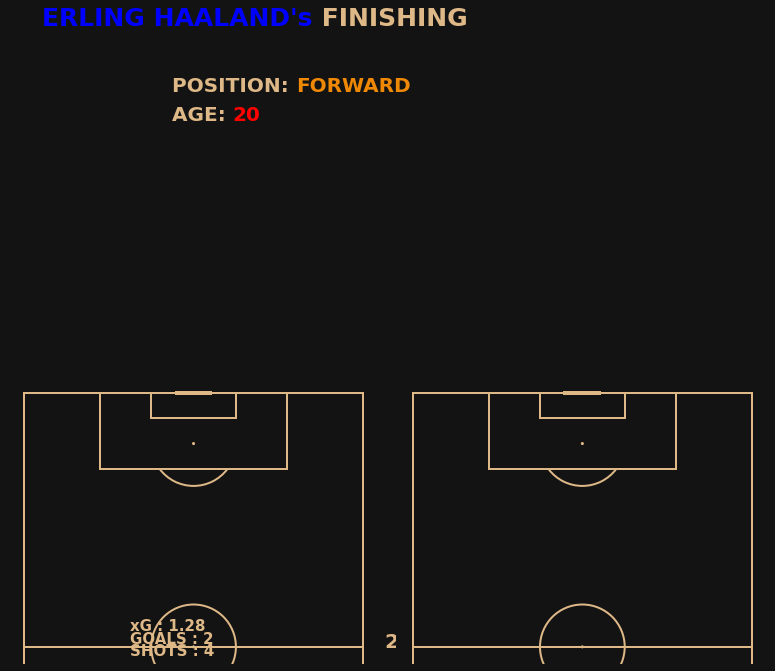

In [54]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='statsbomb',line_zorder=3,pitch_color='#131313',line_color="#DEB887")
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2019]
import seaborn as sns

# pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
#               s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
#               edgecolor='black', facecolor='grey', ax=ax_opta1)

# #NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
# pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
#               s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
#               edgecolor='black', facecolor='#6778d0', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
# ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(85, 60, '2019-20', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2020]



# ADDING TITLES AND INFO
fig_text(0.1,0.94,"<ERLING HAALAND's> FINISHING",weight='heavy', size=25, highlight_colors=['blue'])
fig_text(0.25,0.85,'POSITION: <FORWARD>',weight='bold', size=20, highlight_colors=['#EF8804'])
fig_text(0.25,0.81,'AGE: <20>',weight='bold', size=20, highlight_colors=['red'])

# ADDING CLUB LOGO
# ax_team = fig.add_axes([0.27,0.55,0.15,0.15])
# ax_team.axis('off')
# im = plt.imread('bvb.png')
# ax_team.imshow(im)

# ADDING A FOOTER
# fig_text(0.05,0.03,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com and Understat.com. Comparison with <forwards>'+
#         ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
#         size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

#plt.savefig('Haaland_viz.png',dpi=300,facecolor=background)

## source(https://github.com/victorballesteros8/understat-futbol/blob/main/Understat.ipynb)

In [64]:
from matplotlib.patches import Circle, Rectangle, Arc

def media_cancha(ax=None, color='white', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((1, 0.204), -0.17, 0.592, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((1, 0.352), -0.057, 0.296, linewidth=lw, color=color, fill=False)
    porteria = Rectangle((1, 0.44), 0.008, 0.12, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.838, 0.5), 0.065, 0.2, theta1=95, theta2=265, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.025, 0.038, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((1, 0), 0.025, 0.038, theta1=90, theta2=180, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((1, 0), -0.5, 1, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

<Figure size 2880x2880 with 0 Axes>

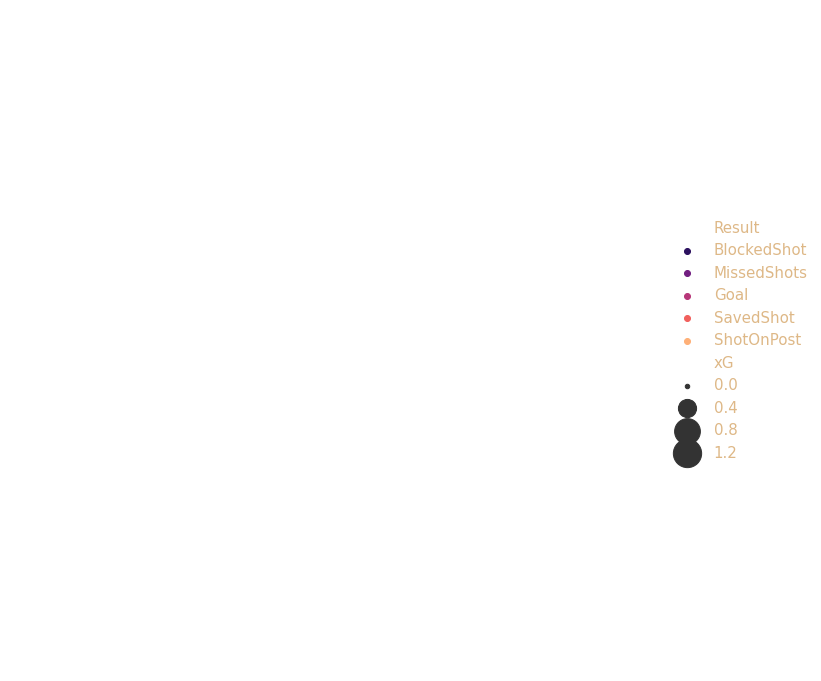

In [65]:

#Incluir el gráfico de tiros en el dibujo de la media cancha
plt.figure(figsize=(40,40))
sns.relplot(x="X", y="Y", hue="Result", size="xG",
            sizes=(20, 800), alpha=.5, palette="magma",
            height=10, data=df_fil)
media_cancha(outer_lines=True)
plt.xlim(0.4,1.1)
plt.ylim(-0.1,1.1)
plt.axis("off")
plt.show();

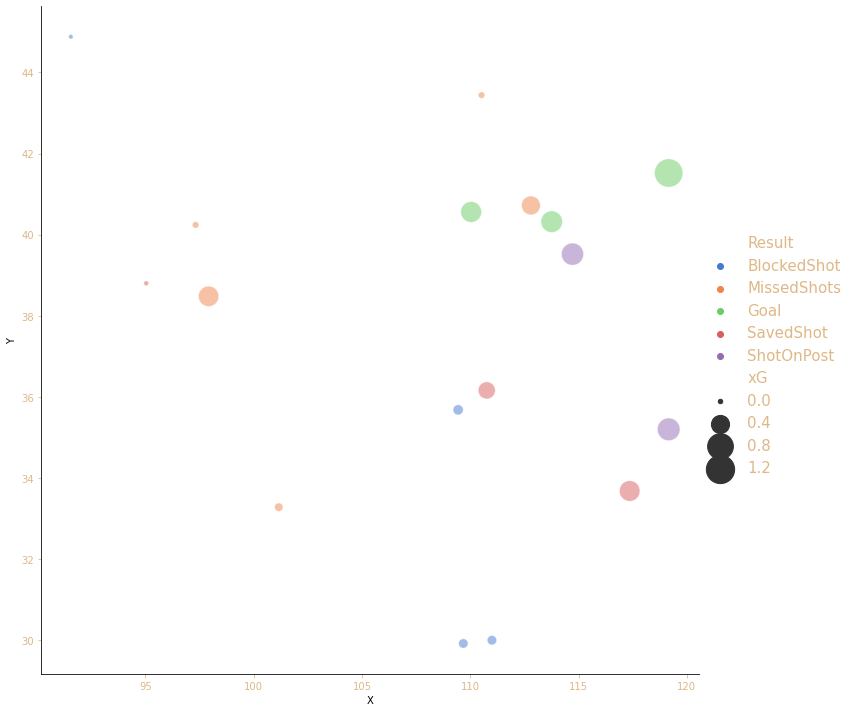

In [58]:
sns.relplot(x="X", y="Y", hue="Result", size="xG",
            sizes=(20, 800), alpha=.5, palette="muted",
            height=10, data=df_fil)

In [57]:
df_fil

,Player,PlayerId,Situation,ShotType,X,Y,xG,Result,Season,MatchId
4,Frenkie de Jong,7781,OpenPlay,RightFoot,109.439996,35.679999,0.126620,BlockedShot,2020,14817
5,Frenkie de Jong,7781,OpenPlay,Head,110.519998,43.439999,0.053257,MissedShots,2020,14845
6,Frenkie de Jong,7781,FromCorner,Head,112.800000,40.720001,0.428009,MissedShots,2020,14875
7,Frenkie de Jong,7781,OpenPlay,LeftFoot,91.560004,44.879999,0.026599,BlockedShot,2020,14885
8,Frenkie de Jong,7781,OpenPlay,RightFoot,110.039996,40.560001,0.520452,Goal,2020,14905
9,Frenkie de Jong,7781,OpenPlay,RightFoot,95.039996,38.800000,0.030876,SavedShot,2020,14928
10,Frenkie de Jong,7781,OpenPlay,RightFoot,113.760004,40.320001,0.557066,Goal,2020,14942
11,Frenkie de Jong,7781,OpenPlay,RightFoot,101.160004,33.279999,0.086624,MissedShots,2020,14951
12,Frenkie de Jong,7781,OpenPlay,RightFoot,119.160004,41.520001,0.964193,Goal,2020,14972
13,Frenkie de Jong,7781,OpenPlay,RightFoot,111.000000,30.000000,0.108885,BlockedShot,2020,15010
